<a href="https://colab.research.google.com/github/GAJANAN07/GAJANAN07/blob/main/project_on_%5B_CALORIES_BURNT_PREDICTION_%5D_by_gajanan_purud_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME** = *GAJANAN*  *PURUD*

# **PROJECT** **ON** : [ CALORIES BURNT PREDICTION ]

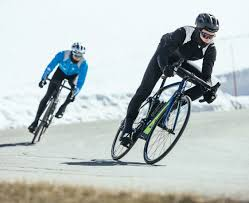

### **OBJECTIVE** : THE MAIN IDEA OF THIS PROJECT IS TO DEVELOP A APPLICATION THAT CAN COUNT THE NO OF CALORIES BURNED WHILE DOING VARIOUS PHYSICAL ACTIVITIES SUCH AS CYCLING , RUNNING , AND VARIOUS OTHER PHYSICAL ACTIVITIES.....

### THE PROJECT MAINLY FOCUSES ON PREDICTION OF CALORIES WITH MACHINE LEARNING USING PYTHON . WE WILL PREDICT CALORIES BURNT BASED ON SOME FEATURES 

### THE PROJECT IS BEAUTIFULLY DESIGNED WITH THE HELP OF MACHINE LEARNING MODEL WITH THE HELP OF XGBoost REGRESSION MODEL...

## **SO** **LETS** **START**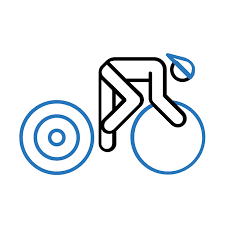

# ***IMPORTING*** ***THE*** ***DEPENDENCIES***  ***AND*** ***LIBRARIES*** 

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics 
from sklearn.model_selection import train_test_split

# **COLLECTION** **OF** **DATA** **AND** **PROCESSING** 

IMPORT DATASET


In [ ]:
# LOADING THE DATA FROM CSV FILE TO A PANDAS DATA FRAME
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# PRINT THE FIRST 5 ROWS OF THE DATA FRAME 
calories.head()


,User_ID,Calories
0,14733363,59
1,14861698,90
2,11179863,58
3,16180408,134
4,17771927,69


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,50,180,80,30,107,40.8
1,14861698,female,35,150,76,15,95,40.3
2,11179863,male,76,180,67,4,89,38.7
3,16180408,female,36,180,77,13,97,40.5
4,17771927,female,78,157,85,11,80,39.8


## ***COMBINING THE TWO DATA FRAMES***

#MERGE THE DATASETS

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,50,180,80,30,107,40.8,59
1,14861698,female,35,150,76,15,95,40.3,90
2,11179863,male,76,180,67,4,89,38.7,58
3,16180408,female,36,180,77,13,97,40.5,134
4,17771927,female,78,157,85,11,80,39.8,69


# ***checking*** ***the*** ***number*** ***of*** ***rows*** ***and*** ***columns***

In [ ]:
calories_data.shape

(15000, 9)

## **GETTING** **SOME** **INFORMATION** **ABOUT** **THE** **DATA** 

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


# **checking** **for** **missing** **values** 

In [ ]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# **ANALYSIS** **OF** **DATA** 

In [ ]:

# get some statistical measures about the data

In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.808267,174.465733,74.968333,15.531133,95.518333,40.025453,89.543333
std,2.872851e+06,16.991102,14.256202,15.032556,8.319674,9.583516,0.779230,62.497258
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,40.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,89.000000,222.000000,132.000000,30.000000,128.000000,41.500000,404.000000


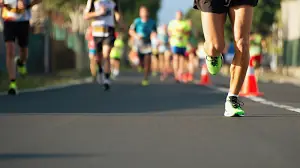

# ***VISUALIZATION*** ***OF*** ***DATA***

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


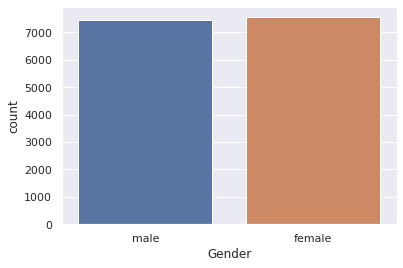

In [ ]:
#PLOTTING THE GENDER COLUMN IN COUNT PLOT
sns.countplot(calories_data['Gender'])

### ***FINDING*** ***THE*** ***DISTRIBUTION*** ***OF*** '***USER_ID***' ***VISUALIZATION***

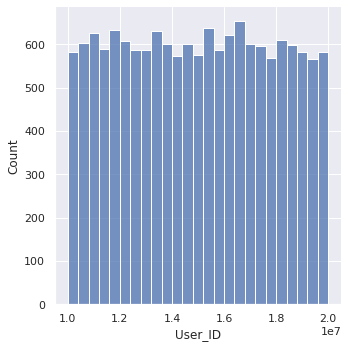

In [ ]:
sns.displot(calories_data['User_ID'])

## ***FINDING*** ***THE*** ***DISTRIBUTION*** ***OF*** "***AGE***" **COLUMN**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


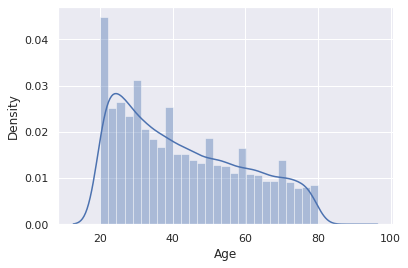

In [ ]:
sns.distplot(calories_data['Age'])

## ***FINDING*** ***THE*** ***DISTRIBUTION*** ***OF*** "***HEIGHT***" ***COLUMN***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


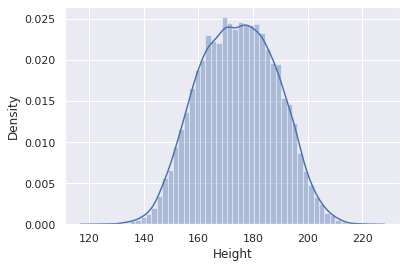

In [ ]:
sns.distplot(calories_data['Height'])

## ***FINDING*** ***THE*** ***DISTRIBUTION*** ***OF*** "***WEIGHT***" ***COLUMN***



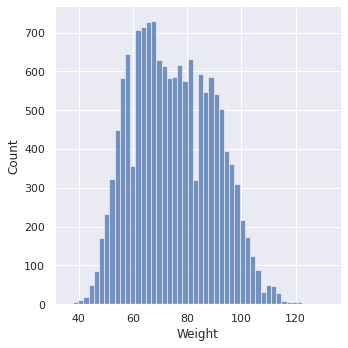

In [ ]:
sns.displot(calories_data['Weight'])

## ***VISUALIZATON*** ***OF*** '***DURATION***'

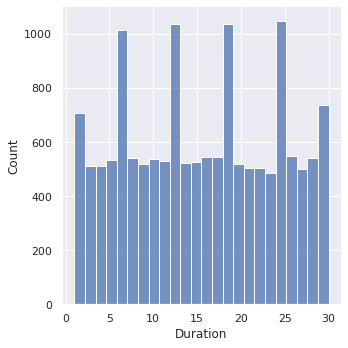

In [ ]:
sns.displot(calories_data['Duration'])

### ***DISTRIBUTION*** ***OF*** ***HEART*** ***RATE***

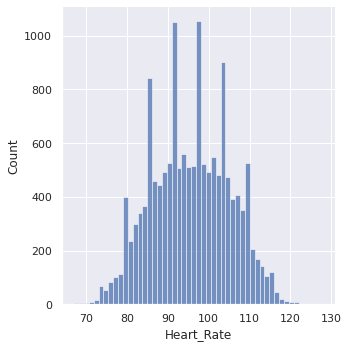

In [ ]:
sns.displot(calories_data['Heart_Rate'])

### ***FINDING THE DISTRIBUTION OF 'BODY_TEMP'***

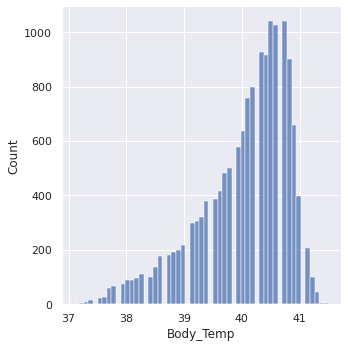

In [ ]:
sns.displot(calories_data['Body_Temp'])

## ***DISTRIBUTION*** ***OF*** '***CALORIES***'

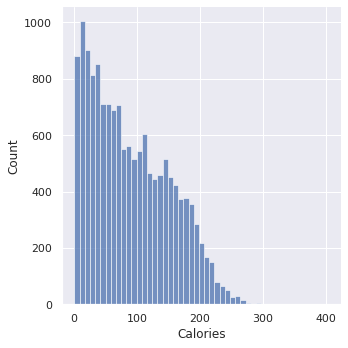

In [ ]:
sns.displot(calories_data['Calories'])

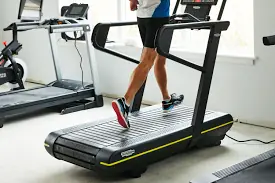

# ***FINDING*** ***THE*** ***CORRELATION*** ***IN*** ***THE*** ***DATASET***


1] POSITIVE CORRELATION

2] NEGATIVE CORRELATION


In [ ]:
correlation = calories_data.corr()

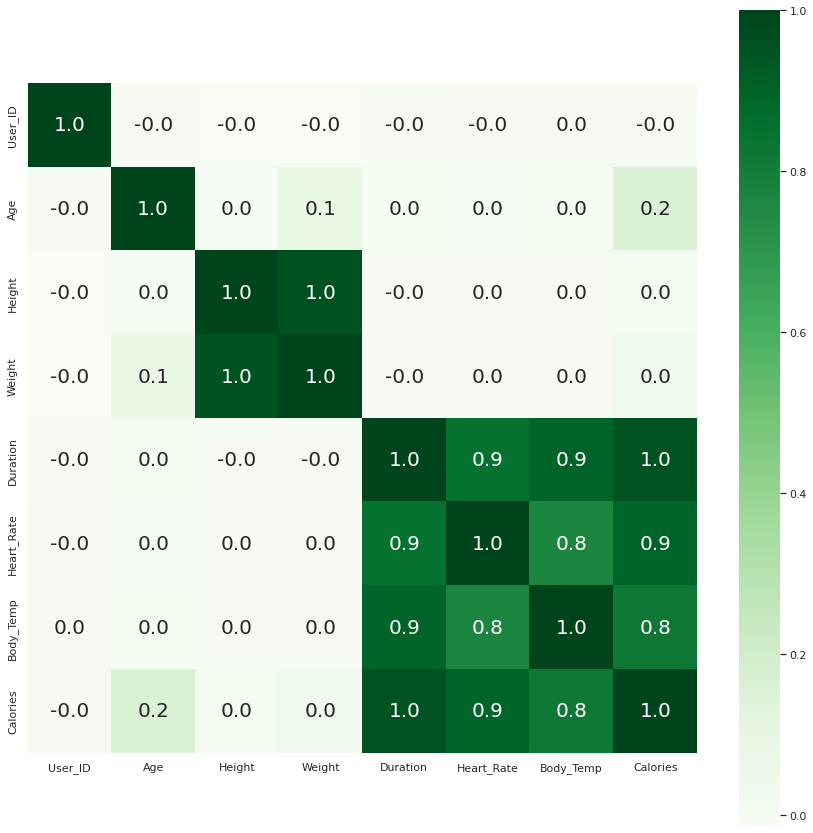

In [ ]:
# DESIGNING THE  HEAPMAP TO UNDERSTAND THE CORRELATION
plt.figure(figsize=(15,15))
sns.heatmap(correlation , cbar=True , square= True, fmt='.1f', annot =True , annot_kws ={'size':20}, cmap='Greens')

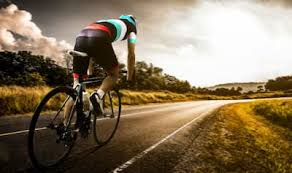

# ***CONVERTING*** ***THE*** **TEXT** ***DATA*** ***TO*** ***NUMERICAL*** ***VALUUES*** 


In [ ]:

calories_data .replace({"Gender":{'male':0,'female':1}} , inplace=True)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,50,180,80,30,107,40.8,59
1,14861698,1,35,150,76,15,95,40.3,90
2,11179863,0,76,180,67,4,89,38.7,58
3,16180408,1,36,180,77,13,97,40.5,134
4,17771927,1,78,157,85,11,80,39.8,69


## ***SEPARATING*** ***FEATURES*** ***AND*** ***TARGET***

In [ ]:
 X = calories_data.drop(columns=['User_ID','Calories'], axis=1)


 Y = calories_data ['Calories']

In [ ]:
 print (X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   50     180      80        30         107       40.8
1           1   35     150      76        15          95       40.3
2           0   76     180      67         4          89       38.7
3           1   36     180      77        13          97       40.5
4           1   78     157      85        11          80       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [ ]:
 print(Y)

0         59
1         90
2         58
3        134
4         69
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64


## **SPLITTING** **THE** **DATA** **INTO** **TRAINING** **DATA** **AND** **TEST** **DATA**:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# *MODEL* *TRAINING*

## **XGBoost** **Regressor**

In [ ]:
model = XGBRegressor()   # LOAD THE MODEL

In [ ]:
model.fit(X_train,Y_train) #TRAINING THE MODEL WITH X_TRAIN

[07:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

***EVALUATION***

***PREDICTION*** **ON** ***TEST*** ***DATA***

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[129.72382  226.33379   37.219707 ... 147.63805   22.190346  91.98054 ]


## **mean** **absolute** **error** 

In [ ]:
mae = metrics.mean_absolute_error(Y_test , test_data_prediction)

In [ ]:
print("Mean Absolute Error = " , mae)

Mean Absolute Error =  2.749821112414201


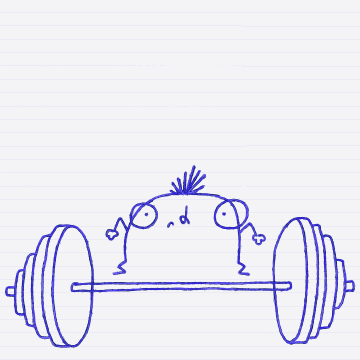

# **THANKYOU**

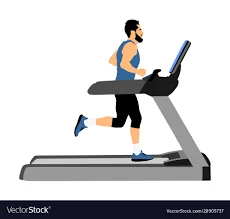